# XGBOOST

In [1]:
import pandas as pd

## CARGAR NUEVAMENTE EL DATA SET DE TRAINING LIMPIO

In [30]:
df_train_models = pd.read_excel("df_train_models.xlsx")

## MODEL

In [6]:
pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\aleja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.2/99.8 MB 1.4 MB/s eta 0:01:09
   ---------------------------------------- 0.5/99.8 MB 2.2 MB/s eta 0:00:47
   ---------------------------------------- 0.7/99.8 MB 2.8 MB/s eta 0:00:36
    --------------------------------------- 1.3/99.8 MB 3.9 MB/s eta 0:00:26
    --------------------------------------- 2.2/99.8 MB 5.5 MB/s eta 0:00:18
   - -------------------------------------- 3.2/99.8 MB 7.2 MB/s eta 0:00:14
   - -------------------------------------- 4.4/99.8 MB 8.8 MB/s eta 0:00:11
   -- ------------------------------------- 5.7/99.8 MB 10.3 MB/s eta 0:00:10
   -- ------------------------------------- 6.9/99.8 MB 11.3 MB/s eta 0:00:09
   --- ------------------------------------ 8.0/99.8 MB 11.8 MB/s eta 0:00:08
   --- --

In [10]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [8]:
# Definir el modelo XGBoost
model = xgb.XGBClassifier()

### SELECCIÓN DE HIPERPARÁMETROS

In [9]:
# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

### EXPLICACIÓN DE LOS RANGOS DE LOS HIPERPARÁMETROS DE PRUEBA

##### n_estimators: [50, 100, 200]

###### Razonamiento: Este parámetro controla el número de árboles en el modelo. Menos árboles pueden llevar a un modelo infraajustado, mientras que demasiados pueden llevar a un sobreajuste y aumentar el tiempo de entrenamiento. Los valores de 50, 100 y 200 son comunes para empezar, ya que proporcionan un buen balance entre capacidad de generalización y tiempo de entrenamiento.

##### learning_rate: [0.01, 0.1, 0.2]

###### Razonamiento: El learning rate (o tasa de aprendizaje) controla el tamaño de los pasos que se dan hacia el mínimo de la función de pérdida. Valores bajos como 0.01 tienden a hacer que el modelo sea más robusto, pero requieren más árboles para converger. Valores intermedios como 0.1 son típicamente buenos puntos de partida.

##### max_depth: [3, 4, 5]

###### Razonamiento: Este parámetro determina la profundidad máxima de los árboles. Valores bajos ayudan a prevenir el sobreajuste. En la práctica, profundidades entre 3 y 6 son comunes para evitar sobreajuste mientras se captura suficiente complejidad del modelo.

##### min_child_weight: [1, 2, 3]

###### Razonamiento: Este parámetro especifica el peso mínimo de la suma de instancias de un nodo hijo. Valores bajos pueden hacer el modelo más complejo, permitiendo nodos con menos instancias, mientras que valores más altos lo simplifican. Los valores 1, 2 y 3 son buenos puntos de partida para equilibrar complejidad y generalización.

##### subsample: [0.8, 1.0]

###### Razonamiento: Este parámetro controla la fracción de muestras utilizadas para entrenar cada árbol. Usar una fracción menor a 1.0 (por ejemplo, 0.8) puede ayudar a prevenir sobreajuste. 1.0 significa que se usan todas las muestras.

##### colsample_bytree: [0.8, 1.0]

###### Razonamiento: Este parámetro controla la fracción de características (columnas) a considerar en cada árbol. Valores menores a 1.0 pueden ayudar a prevenir el sobreajuste. Valores comunes son 0.8 y 1.0.

### CROSS VALIDATION

In [11]:
# Definir el Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
"""
Como se tiene un conjunto de datos relativamente pequeño, un valor de k más alto puede ser mejor 
para reducir la variabilidad de la estimación del rendimiento del modelo. Razón por la que se elige 10 y no 5 folds
"""

'\nComo se tiene un conjunto de datos relativamente pequeño, un valor de k más alto puede ser mejor \npara reducir la variabilidad de la estimación del rendimiento del modelo. Razón por la que se elige 10 y no 5 folds\n'

### BÚSQUEDA DE LOS HIPERPARÁMETROS

In [12]:
# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, verbose=1, n_jobs=-1)

#### SEPARAR X, Y

In [17]:
X_train = df_train_models.drop(columns='Survived')
y_train = df_train_models['Survived']

#### ESTANDARIZAR

In [35]:
from sklearn.preprocessing import StandardScaler
# Estandarizar las características
# Estandarizar solo dos columnas específicas, por ejemplo, 'Age' y 'Fare'
columns_to_scale = ['Age', 'Fare']

scaler = StandardScaler()
X_train_scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

# Crear DataFrames con las columnas estandarizadas
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = X_train_scaled_columns

In [36]:
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     in...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [37]:
# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}


In [38]:
# Mostrar el rendimiento de cada combinación de hiperparámetros
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.081339,0.013431,0.016478,0.008086,0.8,0.01,3,1,50,0.8,...,0.764045,0.842697,0.820225,0.797753,0.752809,0.696629,0.910112,0.790137,0.055224,317
1,0.065722,0.010844,0.012459,0.008279,0.8,0.01,3,1,50,1.0,...,0.775281,0.842697,0.831461,0.797753,0.752809,0.707865,0.898876,0.793508,0.050466,313
2,0.124921,0.023646,0.008530,0.002217,0.8,0.01,3,1,100,0.8,...,0.786517,0.853933,0.876404,0.808989,0.797753,0.752809,0.898876,0.821511,0.044344,261
3,0.103434,0.011639,0.007619,0.001552,0.8,0.01,3,1,100,1.0,...,0.786517,0.865169,0.887640,0.820225,0.808989,0.764045,0.898876,0.827141,0.043058,202
4,0.218054,0.026885,0.008461,0.001257,0.8,0.01,3,1,200,0.8,...,0.808989,0.865169,0.887640,0.808989,0.808989,0.764045,0.898876,0.826042,0.042393,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.116243,0.017837,0.012835,0.006013,1.0,0.2,5,3,50,1.0,...,0.831461,0.876404,0.910112,0.786517,0.831461,0.808989,0.853933,0.833908,0.035389,107
320,0.184299,0.020857,0.009380,0.000992,1.0,0.2,5,3,100,0.8,...,0.808989,0.865169,0.887640,0.797753,0.842697,0.786517,0.898876,0.836142,0.035936,76
321,0.168584,0.019609,0.011638,0.002194,1.0,0.2,5,3,100,1.0,...,0.820225,0.887640,0.898876,0.775281,0.853933,0.842697,0.865169,0.840624,0.036527,30
322,0.340849,0.034311,0.014676,0.009147,1.0,0.2,5,3,200,0.8,...,0.831461,0.898876,0.887640,0.764045,0.853933,0.786517,0.876404,0.837278,0.041435,50


### ENTRENAR EL MODELO CON LOS MEJORES HIPERPARÁMETROS

In [39]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### PREDICCIONES

In [40]:
df_test_models = pd.read_excel("df_test_models.xlsx")

In [31]:
# Separar características y etiquetas del conjunto de prueba
X_test = df_test_models.drop(columns='Survived')
y_test = df_test_models['Survived']

#### Estandarizar

In [41]:
X_test_scaled_columns = scaler.transform(X_test[columns_to_scale])
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = X_test_scaled_columns

#### Predicción

In [43]:
y_pred = best_model.predict(X_test_scaled)

#### Evaluar Modelo

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

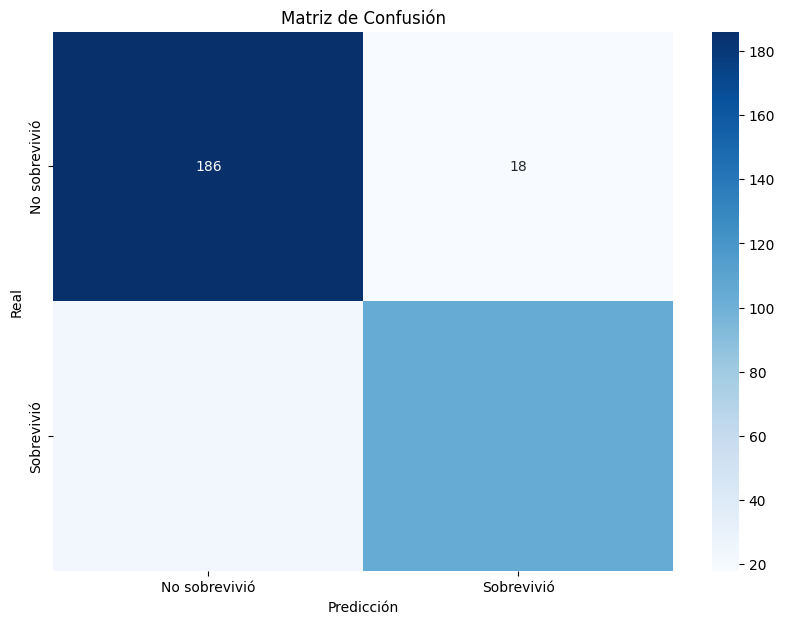

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [46]:
conf_matrix

array([[186,  18],
       [ 23, 104]], dtype=int64)

In [47]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.8761329305135952


In [48]:
# Reporte de clasificación para obtener F1 score, recall y precision (sensibilidad)
class_report = classification_report(y_test, y_pred, output_dict=True)
print(f"Reporte de clasificación:\n{classification_report(y_test, y_pred)}")

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       204
           1       0.85      0.82      0.84       127

    accuracy                           0.88       331
   macro avg       0.87      0.87      0.87       331
weighted avg       0.88      0.88      0.88       331



##### Macro avg: Promedio no ponderado (simple) de precisión, recall y F1-score para ambas clases.
##### Weighted avg: Promedio ponderado de precisión, recall y F1-score teniendo en cuenta el soporte (support) de cada clase.

#### support: Número de ocurrencias reales de cada clase en el conjunto de datos de prueba.

In [50]:
import numpy as np
# Evaluación con Cross-Validation en el conjunto de entrenamiento
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Precisión promedio de Cross-Validation en el conjunto de entrenamiento: {np.mean(cv_scores)}")

Precisión promedio de Cross-Validation en el conjunto de entrenamiento: 0.8507365792759052


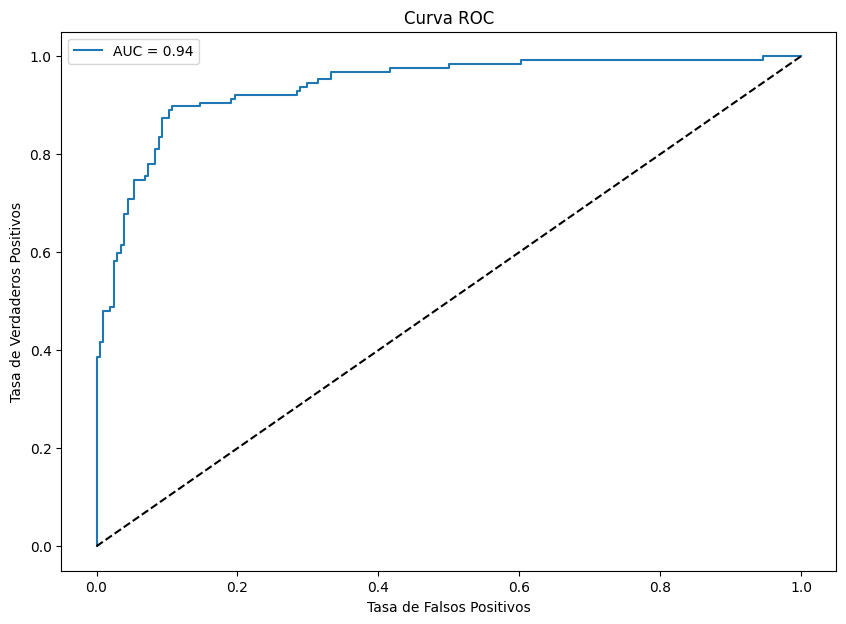

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()


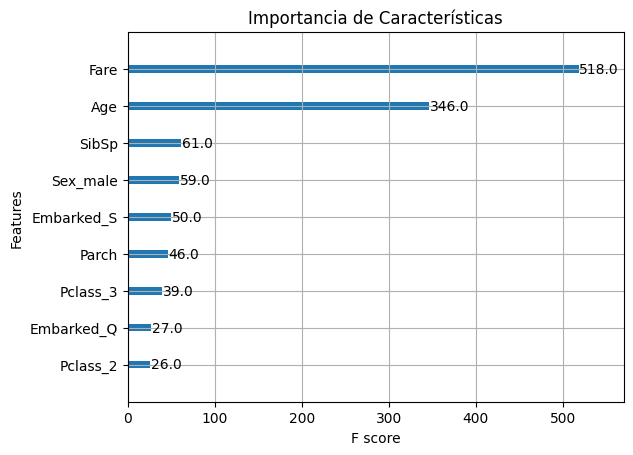

In [55]:
xgb.plot_importance(best_model, importance_type='weight')
plt.title('Importancia de Características')
plt.show()

##### Se ha obtenido un buen rendimiento del modelo, especialmente detectando no sobrevivientes. Adicional a esto, el algoritmo de XGBoost, nos sirve para identificar la importancia de las variables, mostrando que Fare (precio que pagaron por ticket) es la característica más importante, y se relaciona a que la mayoría de sobrevivientes eran de primera clase. Y las variables PClass como están relacionadas al valor del ticket, realmente no aportan nueva información, por eso las variables tienen menor importancia.
#### Seguido está la edad, 

In [68]:
df_train_models['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [75]:
df_titanic_edad = pd.concat([df_train_models,df_test_models])

In [79]:
bins = [0, 15, 25, 49, float('inf')]
labels = ['NIÑO', 'JOVEN', 'ADULTO', 'VIEJO']

df_titanic_edad['grupo_edad'] = pd.cut(df_titanic_edad['Age'], bins=bins, labels=labels, right=False)

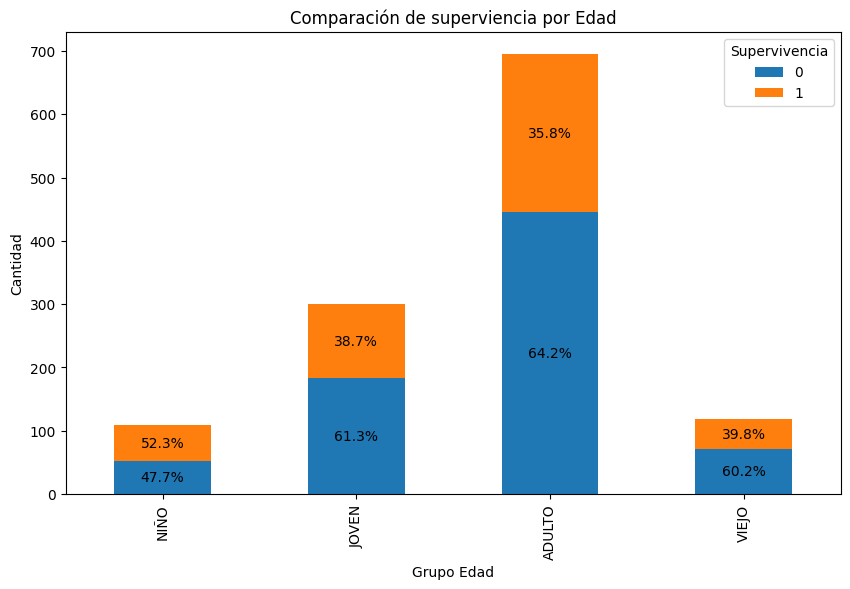

In [81]:
grouped_data = df_titanic_edad.groupby(['grupo_edad', 'Survived']).size().unstack()

percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Comparación de superviencia por Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia')

# Añadir porcentajes en las barras
for container in ax.containers:
    labels = [f'{v.get_height() / grouped_data.sum(axis=1)[i] * 100:.1f}%' if v.get_height() > 0 else '' for i, v in enumerate(container)]
    ax.bar_label(container, labels=labels, label_type='center')

# Mostrar el gráfico
plt.show()

##### Podemos ver que en los niños, hay mucha cercanía entre el número de sobrevivientes y los que no, pero en los adultos, sí vemos que que son más los que no sobreviven.